In [5]:
import csv
from io import StringIO


#Retrieved from https://psl.noaa.gov/data/correlation/nina34.anom.data
# Raw data - years 1948 to 2025
data = """1948 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99
 1949 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99
 1950  -1.99  -1.69  -1.42  -1.54  -1.75  -1.27  -1.01  -0.97  -0.98  -1.03  -1.23  -1.31
 1951  -1.30  -1.04  -0.38  -0.23  -0.01   0.00   0.30   0.17   0.51   0.49   0.55   0.31
 1952   0.13  -0.01  -0.11  -0.02  -0.14  -0.54  -0.76  -0.56  -0.36  -0.46  -0.78  -0.39
 1953   0.20   0.24   0.29   0.22   0.35   0.39   0.14   0.09   0.29   0.16   0.18   0.41
 1954   0.43   0.28  -0.38  -1.17  -0.81  -0.93  -1.18  -1.43  -1.60  -1.48  -1.13  -1.33
 1955  -0.93  -0.95  -1.06  -1.22  -1.28  -1.18  -1.15  -1.35  -1.43  -2.31  -2.45  -2.03
 1956  -1.20  -0.99  -0.83  -0.97  -0.80  -0.92  -1.06  -1.17  -0.98  -0.97  -1.14  -0.89
 1957  -0.51  -0.22   0.18   0.41   0.62   0.63   0.87   0.84   0.72   0.70   0.92   1.30
 1958   1.78   1.49   0.98   0.46   0.38   0.26   0.03  -0.01  -0.32  -0.27   0.05   0.02
 1959   0.53   0.43   0.19   0.06  -0.23  -0.35  -0.86  -0.77  -0.80  -0.48  -0.66  -0.42
 1960  -0.28  -0.46  -0.30  -0.33  -0.25  -0.49  -0.41  -0.15  -0.28  -0.49  -0.45  -0.38
 1961  -0.31  -0.19  -0.35  -0.46  -0.18  -0.06  -0.41  -0.67  -0.94  -1.01  -0.63  -0.63
 1962  -0.59  -0.57  -0.48  -0.69  -0.89  -0.65  -0.53  -0.53  -0.78  -0.75  -0.95  -0.93
 1963  -0.78  -0.53  -0.10  -0.03  -0.30  -0.11   0.49   0.62   0.68   0.64   0.77   1.02
 1964   0.79   0.38  -0.26  -0.87  -1.12  -1.14  -0.96  -1.26  -1.40  -1.35  -1.44  -1.37
 1965  -0.89  -0.56  -0.34  -0.44   0.06   0.36   0.61   1.12   1.29   1.45   1.42   1.36
 1966   1.12   0.80   0.93   0.35  -0.38  -0.08   0.04  -0.37  -0.44  -0.50  -0.47  -0.57
 1967  -0.67  -0.64  -0.78  -1.08  -0.59  -0.26  -0.33  -0.42  -0.86  -0.74  -0.62  -0.65
 1968  -0.85  -1.07  -0.95  -0.72  -0.75   0.15   0.28   0.16   0.01   0.04   0.50   0.67
 1969   0.95   1.11   0.54   0.31   0.35  -0.04  -0.21   0.16   0.43   0.62   0.40   0.38
 1970   0.28   0.20  -0.14  -0.08  -0.30  -0.69  -1.08  -1.26  -1.07  -1.12  -1.13  -1.33
 1971  -1.73  -1.57  -1.36  -1.18  -0.98  -1.13  -1.17  -1.10  -1.00  -1.24  -1.15  -1.23
 1972  -0.92  -0.45  -0.19   0.07   0.38   0.45   0.85   1.09   1.23   1.54   1.90   2.09
 1973   1.80   1.20   0.27  -0.58  -0.97  -1.18  -1.54  -1.63  -1.66  -1.98  -2.37  -2.26
 1974  -2.09  -1.66  -1.45  -1.36  -1.29  -1.20  -0.90  -0.52  -0.64  -0.94  -1.09  -0.97
 1975  -0.45  -0.68  -1.09  -0.96  -1.13  -1.50  -1.39  -1.52  -1.66  -1.83  -1.66  -1.93
 1976  -2.01  -1.26  -0.82  -0.93  -0.74  -0.38  -0.16   0.12   0.30   0.75   0.71   0.49
 1977   0.78   0.37   0.19  -0.38  -0.21   0.01   0.09  -0.01   0.40   0.63   0.48   0.70
 1978   0.62   0.25  -0.20  -0.70  -0.74  -0.71  -0.55  -0.79  -0.71  -0.46  -0.38  -0.06
 1979  -0.13  -0.22  -0.02   0.02  -0.25  -0.29  -0.47  -0.10   0.28   0.11   0.29   0.52
 1980   0.54   0.22   0.03  -0.07   0.08   0.21  -0.06  -0.38  -0.28  -0.26  -0.10   0.05
 1981  -0.36  -0.64  -0.64  -0.53  -0.57  -0.46  -0.64  -0.53  -0.19  -0.30  -0.41  -0.20
 1982   0.13  -0.17   0.13   0.21   0.45   0.53   0.37   0.73   1.49   1.99   1.92   2.20
 1983   2.35   1.94   1.38   0.95   0.90   0.54  -0.11  -0.27  -0.52  -1.16  -1.29  -1.03
 1984  -0.67  -0.19  -0.52  -0.68  -0.73  -0.90  -0.50  -0.24  -0.34  -0.67  -1.19  -1.34
 1985  -1.16  -0.72  -0.79  -1.18  -1.03  -0.91  -0.74  -0.56  -0.70  -0.49  -0.37  -0.41
 1986  -0.66  -0.71  -0.42  -0.33  -0.53  -0.31  -0.11   0.32   0.53   0.81   1.01   1.12
 1987   1.14   1.13   0.98   0.58   0.62   0.92   1.29   1.57   1.65   1.24   1.07   0.94
 1988   0.90   0.28   0.10  -0.44  -1.25  -1.74  -1.74  -1.19  -1.00  -1.90  -2.05  -1.96
 1989  -1.97  -1.47  -1.21  -1.08  -0.88  -0.59  -0.57  -0.53  -0.30  -0.40  -0.45  -0.13
 1990   0.01   0.21   0.04   0.08   0.08  -0.08   0.09   0.22   0.22   0.21   0.10   0.35
 1991   0.49   0.32   0.03   0.19   0.26   0.52   0.76   0.68   0.42   0.86   1.20   1.69
 1992   1.84   1.78   1.38   1.20   1.04   0.58   0.22   0.05  -0.06  -0.30  -0.28  -0.15
 1993   0.14   0.41   0.39   0.59   0.78   0.35   0.23   0.13   0.35   0.06   0.00   0.16
 1994   0.10   0.06   0.11   0.26   0.31   0.32   0.24   0.53   0.48   0.75   1.11   1.25
 1995   1.02   0.73   0.46   0.28  -0.11  -0.14  -0.21  -0.63  -0.84  -0.88  -1.10  -0.95
 1996  -0.86  -0.86  -0.61  -0.47  -0.38  -0.44  -0.44  -0.22  -0.45  -0.44  -0.41  -0.64
 1997  -0.53  -0.37  -0.25   0.16   0.64   1.09   1.56   1.89   2.13   2.36   2.41   2.29
 1998   2.38   2.03   1.34   0.78   0.57  -0.39  -0.99  -1.28  -1.26  -1.46  -1.46  -1.69
 1999  -1.69  -1.32  -0.95  -1.11  -1.15  -1.19  -1.17  -1.22  -1.09  -1.23  -1.58  -1.74
 2000  -1.77  -1.55  -0.98  -0.87  -0.86  -0.79  -0.67  -0.49  -0.52  -0.70  -0.79  -0.92
 2001  -0.73  -0.63  -0.48  -0.49  -0.34  -0.19  -0.04  -0.05  -0.20  -0.14  -0.37  -0.41
 2002  -0.15  -0.04   0.01   0.02   0.31   0.72   0.74   0.87   1.09   1.25   1.47   1.37
 2003   0.60   0.64   0.36  -0.14  -0.61  -0.29   0.21   0.26   0.27   0.42   0.33   0.43
 2004   0.27   0.23   0.12   0.07   0.06   0.13   0.49   0.76   0.81   0.73   0.66   0.74
 2005   0.66   0.36   0.45   0.26   0.30   0.04  -0.23  -0.05  -0.04  -0.06  -0.59  -0.92
 2006  -0.91  -0.67  -0.71  -0.32  -0.09   0.00   0.01   0.31   0.60   0.70   0.99   1.14
 2007   0.70   0.13  -0.18  -0.32  -0.47  -0.35  -0.59  -0.72  -1.11  -1.39  -1.54  -1.58
 2008  -1.68  -1.67  -1.21  -0.99  -0.84  -0.68  -0.30  -0.13  -0.25  -0.35  -0.46  -0.86
 2009  -0.89  -0.79  -0.69  -0.35   0.06   0.31   0.48   0.56   0.68   0.89   1.46   1.74
 2010   1.52   1.25   0.90   0.38  -0.22  -0.69  -1.07  -1.39  -1.60  -1.69  -1.64  -1.60
 2011  -1.54  -1.11  -0.93  -0.77  -0.52  -0.38  -0.43  -0.65  -0.80  -1.05  -1.19  -1.06
 2012  -0.87  -0.67  -0.61  -0.50  -0.32   0.02   0.25   0.47   0.38   0.26   0.16  -0.25
 2013  -0.53  -0.52  -0.25  -0.25  -0.40  -0.42  -0.39  -0.38  -0.18  -0.20  -0.14  -0.17
 2014  -0.49  -0.62  -0.28   0.08   0.32   0.23  -0.06  -0.03   0.29   0.44   0.75   0.71
 2015   0.51   0.42   0.47   0.70   0.92   1.18   1.46   1.93   2.21   2.36   2.72   2.66
 2016   2.57   2.26   1.62   0.91   0.30  -0.03  -0.48  -0.58  -0.58  -0.74  -0.76  -0.50
 2017  -0.43  -0.08   0.03   0.22   0.37   0.34   0.25  -0.16  -0.43  -0.56  -0.97  -0.98
 2018  -0.98  -0.78  -0.80  -0.51  -0.20   0.04   0.12   0.09   0.47   0.90   0.90   0.89
 2019   0.65   0.71   0.81   0.62   0.55   0.45   0.35   0.04   0.03   0.48   0.52   0.52
 2020   0.60   0.37   0.48   0.36  -0.27  -0.34  -0.30  -0.59  -0.83  -1.26  -1.42  -1.15
 2021  -1.00  -1.00  -0.80  -0.72  -0.46  -0.28  -0.39  -0.53  -0.55  -0.94  -0.94  -1.06
 2022  -0.94  -0.89  -0.97  -1.11  -1.11  -0.75  -0.69  -0.97  -1.07  -0.99  -0.90  -0.85
 2023  -0.72  -0.46  -0.11   0.14   0.46   0.84   1.02   1.35   1.60   1.72   2.02   2.03
 2024   1.81   1.52   1.13   0.77   0.23   0.17   0.04  -0.12  -0.26  -0.27  -0.25  -0.60
 2025  -0.74  -0.43   0.01  -0.14  -0.13  -0.07  -0.14  -0.36  -0.46 -99.99 -99.99 -99.99
   -99.99"""

# Parse and format the data
output = StringIO()
writer = csv.writer(output)
writer.writerow(['Date', 'Nino34'])

for line in data.strip().split('\n'):
    parts = line.split()
    # Skip lines that don't start with a year
    if not parts or not parts[0].isdigit():
        continue
    
    year = int(parts[0])
    values = parts[1:]
    
    for month_idx, value in enumerate(values):
        month = month_idx + 1
        date_str = f"{year}-{month:02d}-01"
        writer.writerow([date_str, value])

# Print the CSV content
print(output.getvalue())

# Instructions for saving
print("\n# To save this data:")
print("# 1. Copy all the output above (starting from 'Date,Nino34')")
print("# 2. Save it to a file named 'nino34_index.csv'")
num_rows = len(data.strip().split('\n')) * 12
print(f"# Total rows: {num_rows} (including header)")


# Parse and format the data
with open('climate.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Nino34'])
    
    for line in data.strip().split('\n'):
        parts = line.split()
        # Skip lines that don't start with a year
        if not parts or not parts[0].isdigit():
            continue
        
        year = int(parts[0])
        values = parts[1:]
        
        for month_idx, value in enumerate(values):
            month = month_idx + 1
            date_str = f"{year}-{month:02d}-01"
            writer.writerow([date_str, value])

print("Data saved to climate.csv!")


Date,Nino34
1948-01-01,-99.99
1948-02-01,-99.99
1948-03-01,-99.99
1948-04-01,-99.99
1948-05-01,-99.99
1948-06-01,-99.99
1948-07-01,-99.99
1948-08-01,-99.99
1948-09-01,-99.99
1948-10-01,-99.99
1948-11-01,-99.99
1948-12-01,-99.99
1949-01-01,-99.99
1949-02-01,-99.99
1949-03-01,-99.99
1949-04-01,-99.99
1949-05-01,-99.99
1949-06-01,-99.99
1949-07-01,-99.99
1949-08-01,-99.99
1949-09-01,-99.99
1949-10-01,-99.99
1949-11-01,-99.99
1949-12-01,-99.99
1950-01-01,-1.99
1950-02-01,-1.69
1950-03-01,-1.42
1950-04-01,-1.54
1950-05-01,-1.75
1950-06-01,-1.27
1950-07-01,-1.01
1950-08-01,-0.97
1950-09-01,-0.98
1950-10-01,-1.03
1950-11-01,-1.23
1950-12-01,-1.31
1951-01-01,-1.30
1951-02-01,-1.04
1951-03-01,-0.38
1951-04-01,-0.23
1951-05-01,-0.01
1951-06-01,0.00
1951-07-01,0.30
1951-08-01,0.17
1951-09-01,0.51
1951-10-01,0.49
1951-11-01,0.55
1951-12-01,0.31
1952-01-01,0.13
1952-02-01,-0.01
1952-03-01,-0.11
1952-04-01,-0.02
1952-05-01,-0.14
1952-06-01,-0.54
1952-07-01,-0.76
1952-08-01,-0.56
1952-09-01,-0.36
195

/tmp/ipykernel_38997/603767202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


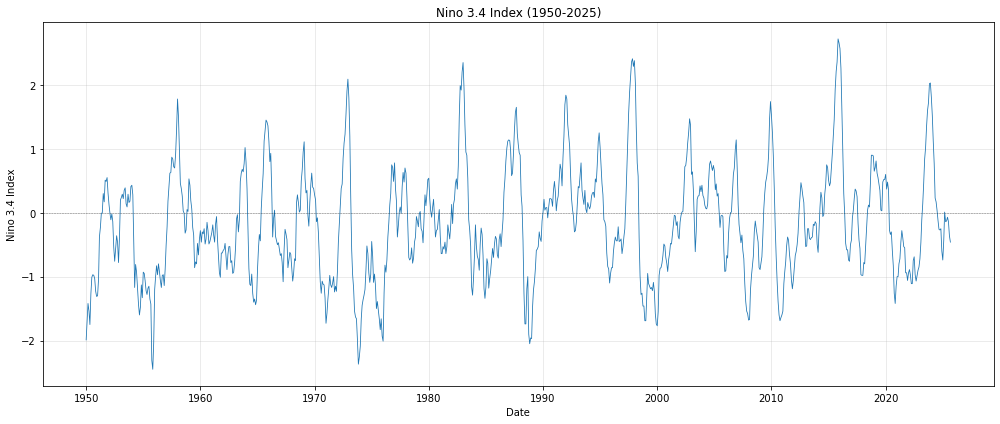

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV
df = pd.read_csv('climate.csv')

# Filter out -99.99 values (missing data)
df_filtered = df[df['Nino34'] != -99.99]

# Convert Date to datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['Date'], df_filtered['Nino34'], linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Nino 3.4 Index')
plt.title('Nino 3.4 Index (1950-2025)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()